In [ ]:
import requests
import json
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

username = 'Ephraim.klestzick@rossilabs.com'
password = '#nieceFULL40#'
server_name = 'https://chesapeake.sisense.com/'

login_data =    {  'username' : username,
                        'password' : password
                    }

login_url = server_name + '/api/v1/authentication/login'
login_res = requests.post(url=login_url, data=login_data).json()

access_token = login_res.get('access_token')
if len(access_token) > 0:
    print('login succesful.')

api_header = {'Authorization': 'Bearer ' + access_token}

url = server_name + '/api/v1/users?'

urlSQL = server_name + '/api/datasources/ML_Project/sql?count=-1&includeMetadata=true&query=select%20%2A%20from%20ML_Features_revenue'

response = requests.get(urlSQL, headers=api_header)
if response.status_code == 404:
    print("Error: API endpoint not found.")

response_data = json.loads(response.text)
print(json.loads(response.text))

login succesful.
{'headers': ['Month', 'JobsStarted', 'Division1JobsStarted', 'Division2JobsStarted', 'Division3JobsStarted', 'VolumeHousingJobsStarted', 'CustomHousingJobsStarted', 'CommercialJobsStarted', 'JobsEnded', 'Division1JobsEnded', 'Division2JobsEnded', 'Division3JobsEnded', 'VolumeHousingJobsEnded', 'CustomHousingJobsEnded', 'CommercialJobsEnded', 'JobTransactions', 'Underslab', 'Rough', 'Trim', 'SW', 'Revenue', 'RoughRevenue', 'RyanHomesJobs', 'LennarJobs', 'BlenheimJobs', 'InsightJobs', 'SchellJobs', 'Month1', 'AverageDaysToStart', 'AverageDaysToComplete', 'Company001Jobs', 'Company002Jobs', 'Company003Jobs', 'Month2', 'TotalRevenue', 'VolumeHousingRevenuePct', 'CustomHousingRevenuePct', 'CommercialRevenuePct', 'Division1RevenuePct', 'Division2RevenuePct', 'Division3RevenuePct', 'UnderslabRevenuePct', 'Division1UnderslabRevenuePct', 'Division2UnderslabRevenuePct', 'Division3UnderslabRevenuePct', 'VolumeHousingUnderslabRevenuePct', 'CustomHousingUnderslabRevenuePct', 'Comme

In [ ]:
import pandas as pd
headers = response_data['headers']
values = response_data['values']

# Create a DataFrame using pandas
df = pd.DataFrame(values, columns=headers)

# Display the DataFrame
df.head()

,Month,JobsStarted,Division1JobsStarted,Division2JobsStarted,Division3JobsStarted,VolumeHousingJobsStarted,CustomHousingJobsStarted,CommercialJobsStarted,JobsEnded,Division1JobsEnded,...,Division3SWRevenuePct,VolumeHousingSWRevenuePct,CustomHousingSWRevenuePct,CommercialSWRevenuePct,RyanSWRevenuePct,LennarSWRevenuePct,BlenheimSWRevenuePct,InsightSWRevenuePct,SchellSWRevenuePct,TargetRev
0,2020-01,875,442,183,144,611,80,41,63,35,...,31.7281,96.6668,0.9074,1.1214,48.5904,6.3236,3.2013,4.5663,5.2460,3754130.88
1,2020-02,307,160,54,58,246,23,16,39,16,...,27.0930,83.5327,2.4684,6.0854,31.3584,5.4320,1.4866,6.1153,13.5840,3435536.23
2,2020-03,364,187,40,102,313,18,8,55,28,...,30.9801,82.4514,0.0000,6.0383,47.0564,2.5133,2.2308,5.7036,5.3425,3999438.70
3,2020-04,298,118,55,94,260,17,3,69,19,...,32.6037,79.0620,1.2326,6.3667,23.9558,5.3055,4.0556,10.9322,3.3782,4306448.62
4,2020-05,348,123,115,51,294,14,9,123,61,...,20.5479,84.6001,0.9686,2.6229,26.7399,6.0074,2.3175,10.9326,6.4423,3930487.27


In [ ]:
#data wrangling
# df.set_index(df.columns[0], inplace=True)
df.reset_index(inplace=True)
df.drop(['TotalRevenue'], axis=1,inplace=True)
df.drop(['Revenue'], axis=1,inplace=True)
df.drop(['Month2'], axis=1,inplace=True)
df.drop(['Month1'], axis=1,inplace=True)
df.drop(['Month'], axis=1,inplace=True)
df.head()

,index,JobsStarted,Division1JobsStarted,Division2JobsStarted,Division3JobsStarted,VolumeHousingJobsStarted,CustomHousingJobsStarted,CommercialJobsStarted,JobsEnded,Division1JobsEnded,...,Division3SWRevenuePct,VolumeHousingSWRevenuePct,CustomHousingSWRevenuePct,CommercialSWRevenuePct,RyanSWRevenuePct,LennarSWRevenuePct,BlenheimSWRevenuePct,InsightSWRevenuePct,SchellSWRevenuePct,TargetRev
0,0,875,442,183,144,611,80,41,63,35,...,31.7281,96.6668,0.9074,1.1214,48.5904,6.3236,3.2013,4.5663,5.2460,3754130.88
1,1,307,160,54,58,246,23,16,39,16,...,27.0930,83.5327,2.4684,6.0854,31.3584,5.4320,1.4866,6.1153,13.5840,3435536.23
2,2,364,187,40,102,313,18,8,55,28,...,30.9801,82.4514,0.0000,6.0383,47.0564,2.5133,2.2308,5.7036,5.3425,3999438.70
3,3,298,118,55,94,260,17,3,69,19,...,32.6037,79.0620,1.2326,6.3667,23.9558,5.3055,4.0556,10.9322,3.3782,4306448.62
4,4,348,123,115,51,294,14,9,123,61,...,20.5479,84.6001,0.9686,2.6229,26.7399,6.0074,2.3175,10.9326,6.4423,3930487.27


In [ ]:
print(df.columns)
print(df.describe)

Index(['index', 'JobsStarted', 'Division1JobsStarted', 'Division2JobsStarted',
       'Division3JobsStarted', 'VolumeHousingJobsStarted',
       'CustomHousingJobsStarted', 'CommercialJobsStarted', 'JobsEnded',
       'Division1JobsEnded', 'Division2JobsEnded', 'Division3JobsEnded',
       'VolumeHousingJobsEnded', 'CustomHousingJobsEnded',
       'CommercialJobsEnded', 'JobTransactions', 'Underslab', 'Rough', 'Trim',
       'SW', 'RoughRevenue', 'RyanHomesJobs', 'LennarJobs', 'BlenheimJobs',
       'InsightJobs', 'SchellJobs', 'AverageDaysToStart',
       'AverageDaysToComplete', 'Company001Jobs', 'Company002Jobs',
       'Company003Jobs', 'VolumeHousingRevenuePct', 'CustomHousingRevenuePct',
       'CommercialRevenuePct', 'Division1RevenuePct', 'Division2RevenuePct',
       'Division3RevenuePct', 'UnderslabRevenuePct',
       'Division1UnderslabRevenuePct', 'Division2UnderslabRevenuePct',
       'Division3UnderslabRevenuePct', 'VolumeHousingUnderslabRevenuePct',
       'CustomHousing

In [ ]:
df.head()

,index,JobsStarted,Division1JobsStarted,Division2JobsStarted,Division3JobsStarted,VolumeHousingJobsStarted,CustomHousingJobsStarted,CommercialJobsStarted,JobsEnded,Division1JobsEnded,...,Division3SWRevenuePct,VolumeHousingSWRevenuePct,CustomHousingSWRevenuePct,CommercialSWRevenuePct,RyanSWRevenuePct,LennarSWRevenuePct,BlenheimSWRevenuePct,InsightSWRevenuePct,SchellSWRevenuePct,TargetRev
0,0,875,442,183,144,611,80,41,63,35,...,31.7281,96.6668,0.9074,1.1214,48.5904,6.3236,3.2013,4.5663,5.2460,3754130.88
1,1,307,160,54,58,246,23,16,39,16,...,27.0930,83.5327,2.4684,6.0854,31.3584,5.4320,1.4866,6.1153,13.5840,3435536.23
2,2,364,187,40,102,313,18,8,55,28,...,30.9801,82.4514,0.0000,6.0383,47.0564,2.5133,2.2308,5.7036,5.3425,3999438.70
3,3,298,118,55,94,260,17,3,69,19,...,32.6037,79.0620,1.2326,6.3667,23.9558,5.3055,4.0556,10.9322,3.3782,4306448.62
4,4,348,123,115,51,294,14,9,123,61,...,20.5479,84.6001,0.9686,2.6229,26.7399,6.0074,2.3175,10.9326,6.4423,3930487.27


In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))
    if type(series) is tuple:
      for series_num in series:
        # Plot the time series data
        plt.plot(time[start:end], series_num[start:end], format)

    else:
      # Plot the time series data
      plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")
    # Label the y-axis
    plt.ylabel("Value")

    # Overlay a grid on the graph
    plt.grid(True)
    # Draw the graph on screen
    plt.show()

In [ ]:
def plot_series2(x, y, format="-", start=0, end=None,
                title=None, xlabel=None, ylabel=None, legend=None ):


    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    # Check if there are more than two series to plot
    if type(y) is tuple:

      # Loop over the y elements
      for y_curr in y:

        # Plot the x and current y values
        plt.plot(x[start:end], y_curr[start:end], format)

    else:
      # Plot the x and y values
      plt.plot(x[start:end], y[start:end], format)

    # Label the x-axis
    plt.xlabel(xlabel)

    # Label the y-axis
    plt.ylabel(ylabel)

    # Set the legend
    if legend:
      plt.legend(legend)

    # Set the title
    plt.title(title)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

In [ ]:
def min_max_scale(dataframe):

    mm = MinMaxScaler()
    return mm.fit_transform(dataframe)

In [ ]:
def split_data(series, train_fraq, test_len=8):
    """Splits input series into train, val and test.

        Default to 8 months of test data.
    """
    #slice the last year of data for testing 1 year has 8760 hours
    test_slice = len(series)-test_len

    test_data = series[test_slice:]
    train_val_data = series[:test_slice]

    #make train and validation from the remaining
    train_size = int(len(train_val_data) * train_fraq)

    train_data = train_val_data[:train_size]
    val_data = train_val_data[train_size:]

    return train_data, val_data, test_data

In [ ]:
#scale and split

df = min_max_scale(df)
train_multi, val_multi, test_multi = split_data(df, train_fraq=0.65, test_len=10)


print("Multivarate Datasets")
print(f"Train Data Shape: {train_multi.shape}")
print(f"Val Data Shape: {val_multi.shape}")
print(f"Test Data Shape: {test_multi.shape}")
print(f"Nulls In Train {np.any(np.isnan(train_multi))}")
print(f"Nulls In Validation {np.any(np.isnan(val_multi))}")
print(f"Nulls In Test {np.any(np.isnan(test_multi))}")

Multivarate Datasets
Train Data Shape: (24, 86)
Val Data Shape: (14, 86)
Test Data Shape: (10, 86)
Nulls In Train False
Nulls In Validation False
Nulls In Test False


In [ ]:
def window_dataset(data, n_steps, n_horizon, batch_size, shuffle_buffer, multi_var=False, expand_dims=False):
    #create a window with n steps back plus the size of the prediction length
    window = n_steps + n_horizon

    #expand dimensions to 3D to fit with LSTM inputs
    #creat the inital tensor dataset
    if expand_dims:
        ds = tf.expand_dims(data, axis=-1)
        ds = tf.data.Dataset.from_tensor_slices(ds)
    else:
        ds = tf.data.Dataset.from_tensor_slices(data)

    #create the window function shifting the data by the prediction length
    ds = ds.window(window, shift=n_horizon, drop_remainder=True)

    #flatten the dataset and batch into the window size
    ds = ds.flat_map(lambda x : x.batch(window))
    ds = ds.shuffle(shuffle_buffer)

    #create the supervised learning problem x and y and batch

    ds = ds.map(lambda x : (x[:-n_horizon], x[-n_horizon:, :1]))


    ds = ds.batch(batch_size).prefetch(1)

    return ds

tf.random.set_seed(6)

n_steps = 6
n_horizon = 1
batch_size = 1
shuffle_buffer = 10


train_ds = window_dataset(train_multi, n_steps, n_horizon, batch_size, shuffle_buffer, multi_var=True)
val_ds = window_dataset(val_multi, n_steps, n_horizon, batch_size, shuffle_buffer, multi_var=True)
test_ds = window_dataset(test_multi, n_steps, n_horizon, batch_size, shuffle_buffer, multi_var=True)

print('Example sample shapes')
for idx,(x,y) in enumerate(train_ds):
    print("x = ", x.numpy().shape)
    print("y = ", y.numpy().shape)
    break

Example sample shapes
x =  (1, 6, 86)
y =  (1, 1, 1)


In [ ]:
def get_params(multivar=False):
    lr = 3e-4
    n_steps=6
    n_horizon=1
    if multivar:
        n_features=85
    else:
        n_features=1

    return n_steps, n_horizon, n_features, lr

model_configs = dict()

def cfg_model_run(model, history, test_ds):
    return {"model": model, "history" : history, "test_ds": test_ds}


def run_model(model_name, model_func, model_configs, epochs):

    n_steps, n_horizon, n_features, lr = get_params(multivar=True)
    model = model_func(n_steps, n_horizon, n_features, lr=lr)

    model_hist = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

    model_configs[model_name] = cfg_model_run(model, model_hist, test_ds)
    return test_ds

In [ ]:
def lstm_model(n_steps, n_horizon, n_features, lr):

    tf.keras.backend.clear_session()

    model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(87, activation='relu', input_shape=(n_steps, n_features), return_sequences=True),
        tf.keras.layers.LSTM(48, activation='relu', return_sequences=False),

        tf.keras.layers.Dense(10, activation='relu'),

        tf.keras.layers.Dense(n_horizon)
    ], name='lstm')

    return model

model = lstm_model(*get_params(multivar=True))




model.summary()

Model: "lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 87)             60204     
                                                                 
 lstm_1 (LSTM)               (None, 48)                26112     
                                                                 
 dense (Dense)               (None, 10)                490       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 86817 (339.13 KB)
Trainable params: 86817 (339.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch / 20))
# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)
# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)
# Train the model
history = model.fit(train_ds, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
20/20 [==============================] - 7s 27ms/step - loss: 0.0706 - lr: 1.0000e-04
Epoch 2/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0640 - lr: 1.1220e-04
Epoch 3/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0577 - lr: 1.2589e-04
Epoch 4/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0509 - lr: 1.4125e-04
Epoch 5/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0450 - lr: 1.5849e-04
Epoch 6/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0400 - lr: 1.7783e-04
Epoch 7/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0356 - lr: 1.9953e-04
Epoch 8/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0321 - lr: 2.2387e-04
Epoch 9/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0293 - lr: 2.5119e-04
Epoch 10/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0271 - lr: 2.8184e-04
Epoch 11/100
20/20 [========

In [ ]:
init_weights = model.get_weights()

(1e-05, 0.1, 0.0, 0.1)

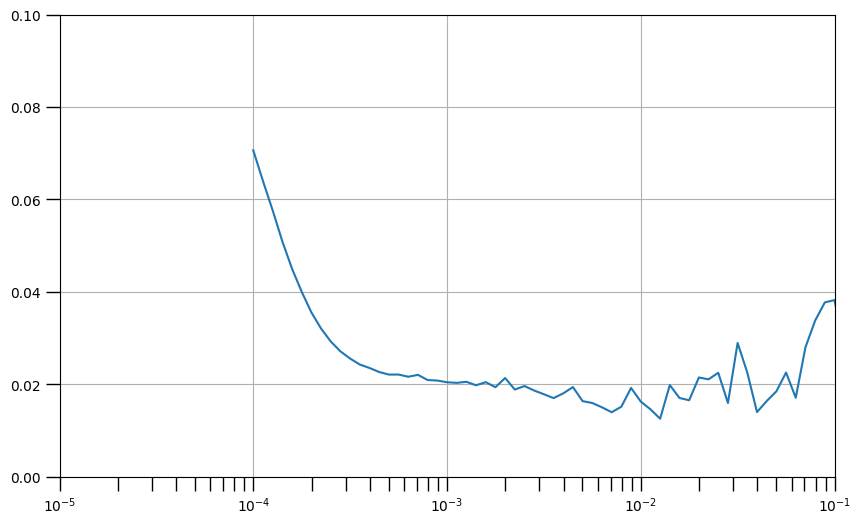

In [ ]:
# Define the learning rate array
lrs = 1e-4 * (10 ** (np.arange(100) / 20))
# Set the figure size
plt.figure(figsize=(10, 6))
# Set the grid
plt.grid(True)
# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])
# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')
# Set the plot boundaries
plt.axis([1e-5, .1, 0, 0.1])

In [ ]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model.set_weights(init_weights)

In [ ]:
# Set the learning rate
learning_rate = 5e-3

# Set the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [ ]:
history = model.fit(train_ds,validation_data=val_ds,epochs=100)

Epoch 1/100
20/20 [==============================] - 3s 36ms/step - loss: 24.8068 - mae: 25.3068 - val_loss: 24.6353 - val_mae: 25.1353
Epoch 2/100
20/20 [==============================] - 0s 12ms/step - loss: 23.9805 - mae: 24.4805 - val_loss: 23.6833 - val_mae: 24.1833
Epoch 3/100
20/20 [==============================] - 0s 13ms/step - loss: 23.0016 - mae: 23.5016 - val_loss: 22.6892 - val_mae: 23.1892
Epoch 4/100
20/20 [==============================] - 0s 14ms/step - loss: 22.0041 - mae: 22.5041 - val_loss: 21.6899 - val_mae: 22.1899
Epoch 5/100
20/20 [==============================] - 0s 11ms/step - loss: 21.0044 - mae: 21.5044 - val_loss: 20.6899 - val_mae: 21.1899
Epoch 6/100
20/20 [==============================] - 0s 12ms/step - loss: 20.0045 - mae: 20.5045 - val_loss: 19.6900 - val_mae: 20.1900
Epoch 7/100
20/20 [==============================] - 0s 12ms/step - loss: 19.0045 - mae: 19.5045 - val_loss: 18.6900 - val_mae: 19.1900
Epoch 8/100
20/20 [=============================

In [ ]:
forecast = model.predict(test_multi)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "lstm" is incompatible with the layer: expected shape=(None, 6, 85), found shape=(None, 85)


In [ ]:
def compute_metrics(true_series, forecast):

    mse = tf.keras.metrics.mean_squared_error(true_series, forecast).numpy()
    mae = tf.keras.metrics.mean_absolute_error(true_series, forecast).numpy()

    return mse, mae

In [ ]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [ ]:
# Compute the forecast for all the series
rnn_forecast = model_forecast(model, df, G.WINDOW_SIZE).squeeze()

# Slice the forecast to get only the predictions for the validation set
rnn_forecast = rnn_forecast[G.SPLIT_TIME - G.WINDOW_SIZE:-1]

# Plot the forecast
plt.figure(figsize=(10, 6))
plot_series(time_valid, series_valid)
plot_series(time_valid, rnn_forecast)

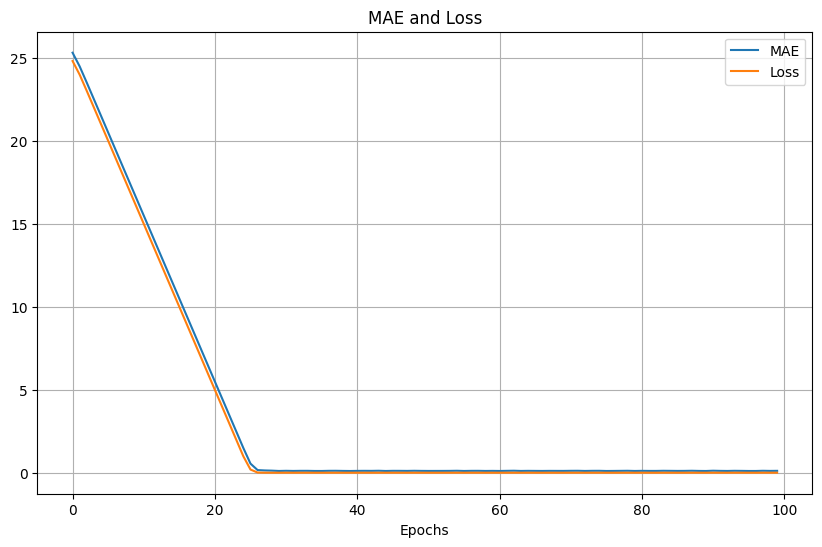

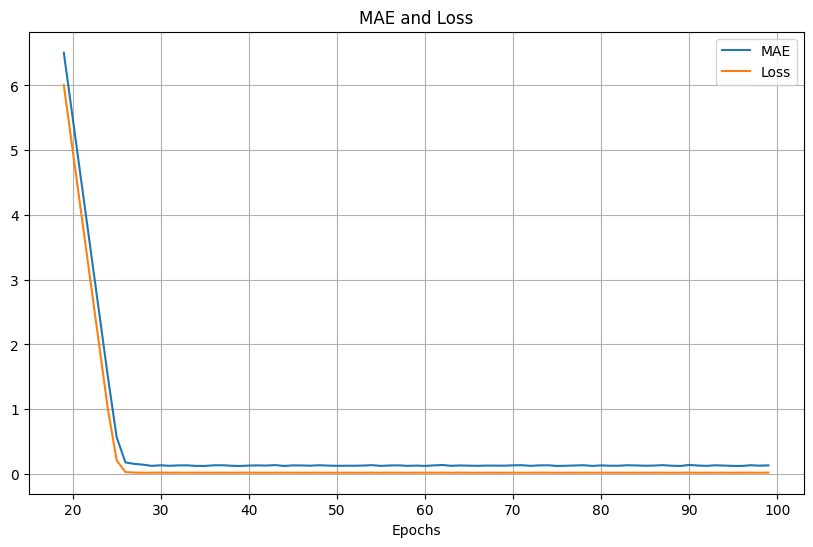

In [ ]:
# Get mae and loss from history log
mae=history.history['mae']
loss=history.history['loss']

# Get number of epochs
epochs=range(len(loss))

# Plot mae and loss
plot_series2(
    x=epochs,
    y=(mae, loss),
    title='MAE and Loss',
    xlabel='Epochs',
    legend=['MAE', 'Loss']
    )

# Only plot the last 80% of the epochs
zoom_split = int(epochs[-1] * 0.2)
epochs_zoom = epochs[zoom_split:]
mae_zoom = mae[zoom_split:]
loss_zoom = loss[zoom_split:]

# Plot zoomed mae and loss
plot_series2(
    x=epochs_zoom,
    y=(mae_zoom, loss_zoom),
    title='MAE and Loss',
    xlabel='Epochs',
    legend=['MAE', 'Loss']
    )

Loss Curves


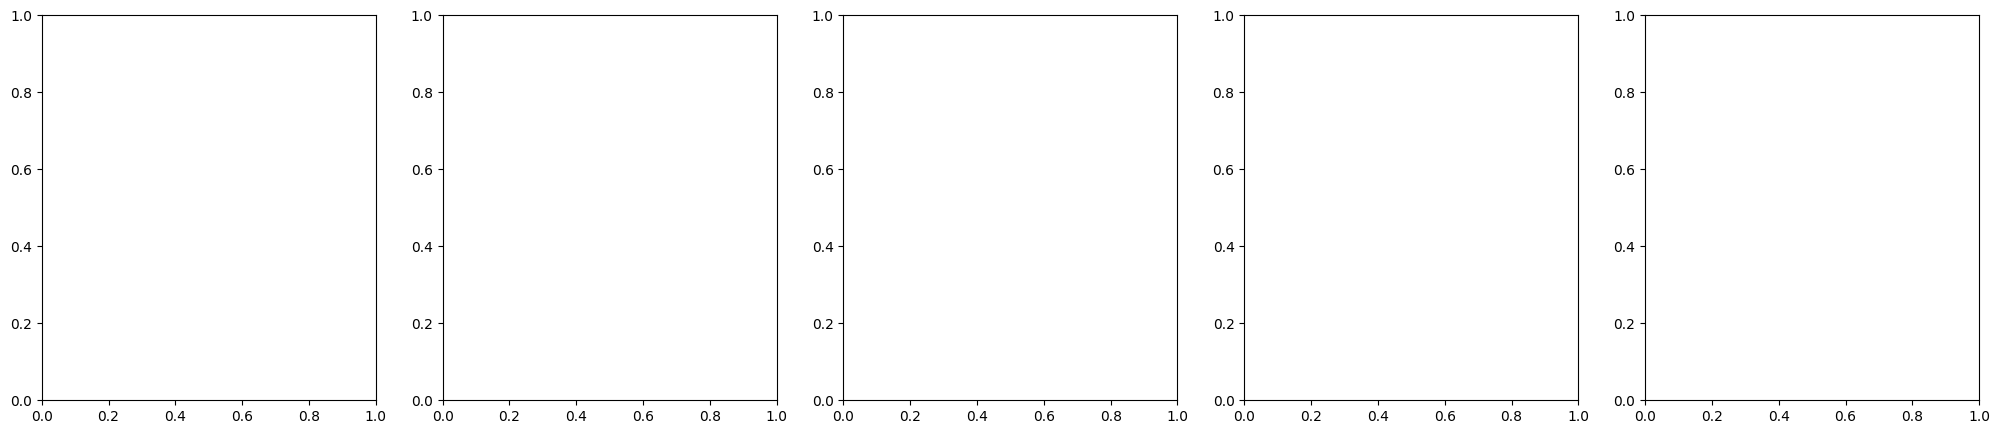

In [ ]:
legend = list()

fig, axs = plt.subplots(1, 5, figsize=(25,5))

def plot_graphs(metric, val, ax, upper):
    ax.plot(val['history'].history[metric])
    ax.plot(val['history'].history[f'val_{metric}'])
    ax.set_title(key)
    ax.legend([metric, f"val_{metric}"])
    ax.set_xlabel('epochs')
    ax.set_ylabel(metric)
    ax.set_ylim([0, upper])

for (key, val), ax in zip(model_configs.items(), axs.flatten()):
    plot_graphs('loss', val, ax, 0.2)
print("Loss Curves")

In [ ]:
test =
preds= model.predict(test_ds)

In [ ]:
def model_forecast(model, series, window_size, batch_size):
    """Uses an input model to generate predictions on data windows

    Args:
      model (TF Keras Model) - model that accepts data windows
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the window
      batch_size (int) - the batch size

    Returns:
      forecast (numpy array) - array containing predictions
    """

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    # Get predictions on the entire dataset
    forecast = model.predict(dataset)

    return forecast

In [ ]:
# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))

NameError: name 'series' is not defined

NameError: name 'forecast' is not defined